# Análisis y Modelado Predictivo con Jupyter Notebook
Este notebook realiza un análisis exploratorio, preprocesamiento y modelado predictivo usando Regresión Lineal, Regresión Logística y Árboles de Decisión en el dataset de salud cardíaca.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

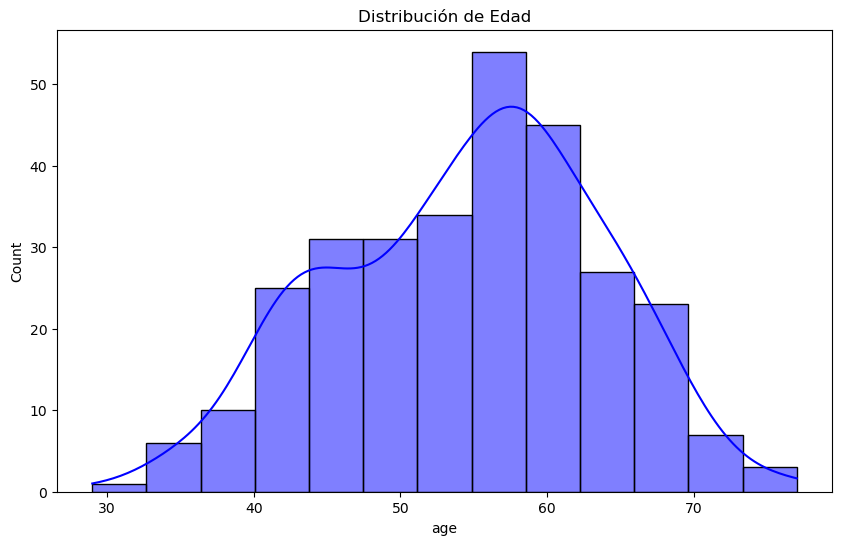

In [10]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('heart_cleveland_upload.csv')
print(data.head())
print(data.describe())

# Visualización de la distribución de edad
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Distribución de Edad')
plt.show()


In [12]:
# Importación de módulos para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definición de X y y
X = data.drop('condition', axis=1)
y = data['condition']

# Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
# Importación de modelos y métricas
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inicialización de modelos
log_reg = LogisticRegression(random_state=42)
lin_reg = LinearRegression()
dtree = DecisionTreeClassifier(random_state=42)

# Entrenamiento
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

lin_reg.fit(X_train, y_train)
y_pred_lin = (lin_reg.predict(X_test) >= 0.5).astype(int)

dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# Función para evaluación
def evaluate_model(y_test, y_pred, model_name):
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    print(classification_report(y_test, y_pred))

# Evaluación
evaluate_model(y_test, y_pred_log, 'Logistic Regression')
evaluate_model(y_test, y_pred_lin, 'Linear Regression')
evaluate_model(y_test, y_pred_tree, 'Decision Tree')


Logistic Regression Metrics:
Accuracy: 0.73
Precision: 0.70
Recall: 0.75
F1 Score: 0.72
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Linear Regression Metrics:
Accuracy: 0.73
Precision: 0.69
Recall: 0.79
F1 Score: 0.73
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

Decision Tree Metrics:
Accuracy: 0.77
Precision: 0.73
Recall: 0.79
F1 Score: 0.76
              precision    recall  f1-score   support

           0       0.80      0.75  

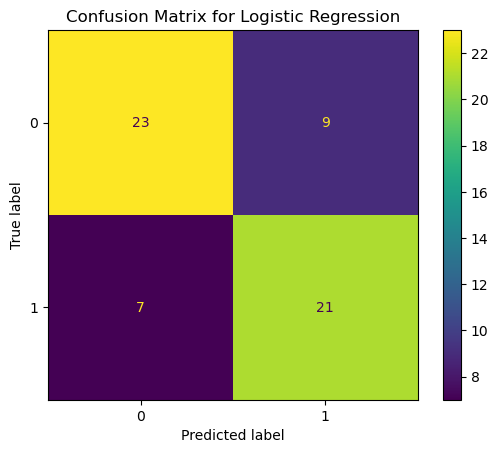

In [16]:
# Visualización de Matriz de Confusión para Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
